In [55]:
import pickle
import pandas as pd
import xgboost as xgb
from xgboost import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold, train_test_split, cross_validate, RepeatedStratifiedKFold, GridSearchCV
import numpy as np
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
import seaborn as sns
import sys
sys.path.append('/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions')
from Evaluation import *
from Preparation import *

In [46]:
X, y, targets, data = preparation_class_8()

/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions/Preparation.py:425: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location = pd.read_csv('../../Dataset/Location.csv')
/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
targets.value_counts()

Crash_Severity      
Serious injury          230687
Property damage only     85807
Minor injury             51083
Fatal                     5713
Name: count, dtype: int64

### Train Test Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

### Trainning Baseline

Accuracy:  0.6204693401912722
Precision:  0.9429383397436368
Recall:  0.6204693401912722
F1-Score:  0.7394882723713713
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.00      0.00      0.00        10
   Minor injury       0.00      0.33      0.00        15
Property damage       0.08      0.48      0.13      2696
 Serious injury       0.98      0.63      0.76     71937

       accuracy                           0.62     74658
      macro avg       0.26      0.36      0.22     74658
   weighted avg       0.94      0.62      0.74     74658



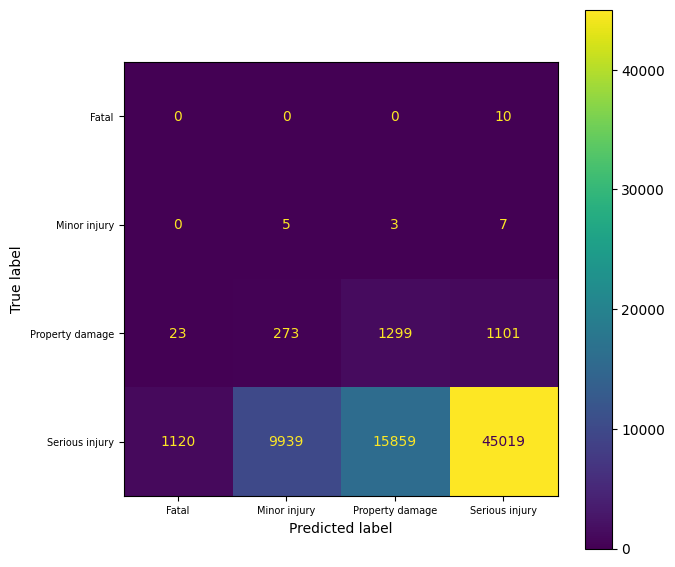

In [48]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_class_8(y_test, y_pred)

In [53]:
pipeline_smote = make_imb_pipeline(SMOTE(random_state=42), XGBClassifier(n_jobs=-1))
pipeline_smoteen = make_imb_pipeline(SMOTEENN(random_state=42), XGBClassifier(n_jobs=-1))
pipeline_tomek = make_imb_pipeline(SMOTETomek(random_state=42), XGBClassifier(n_jobs=-1))
pipeline_under = make_imb_pipeline(RandomUnderSampler(random_state=42), XGBClassifier(n_jobs=-1))

### SMOTE

Best parameters: {'xgbclassifier__n_estimators': 100}
Best score:  0.4277873901086139
-------------------------------------------------------------
Evaluation
Accuracy:  0.4155482332770768
Precision:  0.3994798304735818
Recall:  0.4155482332770768
F1-Score:  0.3843966505754604
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.32      0.07      0.11      5299
   Minor injury       0.35      0.19      0.25     18513
Property damage       0.42      0.34      0.38     21305
 Serious injury       0.43      0.67      0.53     29541

       accuracy                           0.42     74658
      macro avg       0.38      0.32      0.32     74658
   weighted avg       0.40      0.42      0.38     74658



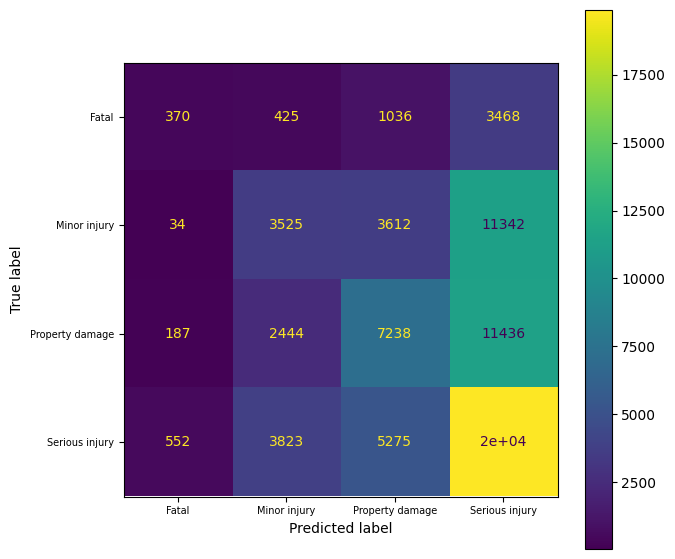

In [61]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'xgbclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_smote, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
evaluation_class_8(y_pred, y_test)
import pickle
with open('model_smote.pkl', 'wb') as file:
    pickle.dump(grid_search, file)


### Undersampling

Best parameters: {'xgbclassifier__n_estimators': 100}
Best score:  0.2685278114876864
-------------------------------------------------------------
Evaluation
Accuracy:  0.2628787269950976
Precision:  0.45124814283417314
Recall:  0.2628787269950976
F1-Score:  0.2492859798027927
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.69      0.05      0.09     17351
   Minor injury       0.44      0.18      0.26     24454
Property damage       0.42      0.33      0.37     22046
 Serious injury       0.16      0.66      0.25     10807

       accuracy                           0.26     74658
      macro avg       0.43      0.30      0.24     74658
   weighted avg       0.45      0.26      0.25     74658



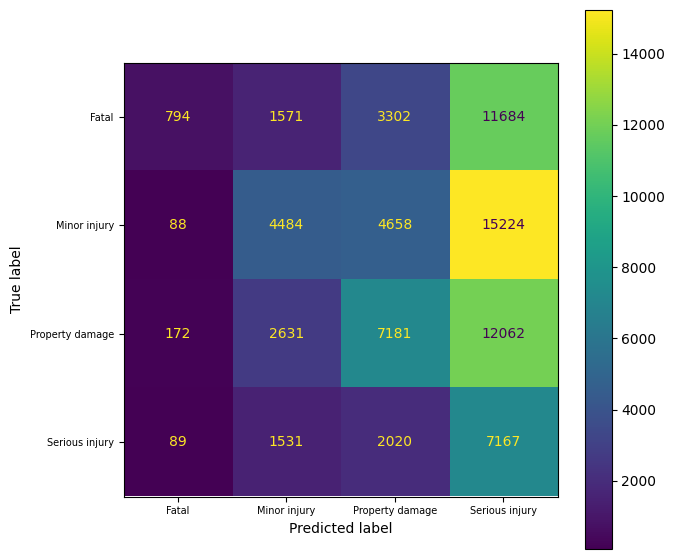

In [60]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'xgbclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_under, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
evaluation_class_8(y_pred, y_test)
with open('model_undersampling.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

### SMOTEENN

Best parameters: {'xgbclassifier__n_estimators': 100}
Best score:  0.5765557567255606
-------------------------------------------------------------
Evaluation
Accuracy:  0.5848669934903158
Precision:  0.7517090082253859
Recall:  0.5848669934903158
F1-Score:  0.6488095116850737
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.15      0.15      0.15      1112
   Minor injury       0.03      0.18      0.06      1945
Property damage       0.19      0.38      0.26      8821
 Serious injury       0.86      0.63      0.73     62780

       accuracy                           0.58     74658
      macro avg       0.31      0.34      0.30     74658
   weighted avg       0.75      0.58      0.65     74658



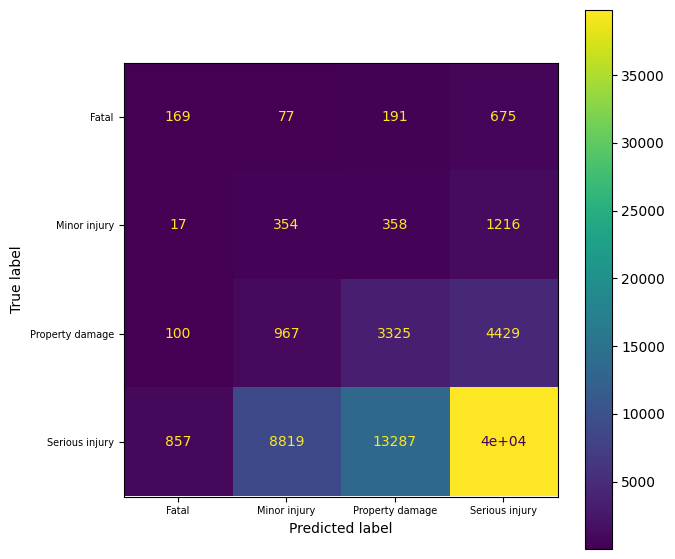

NameError: name 'pickle' is not defined

In [54]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'xgbclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_smoteen, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
evaluation_class_8(y_pred, y_test)
with open('model_smoteen.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

In [56]:
with open('model_smoteen.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

### SMOTE TOMEK

Best parameters: {'xgbclassifier__n_estimators': 100}
Best score:  0.42687656938502033
-------------------------------------------------------------
Evaluation
Accuracy:  0.41309705590827506
Precision:  0.3985966815035767
Recall:  0.41309705590827506
F1-Score:  0.3817696297548953
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.32      0.07      0.11      5331
   Minor injury       0.35      0.19      0.25     18818
Property damage       0.42      0.34      0.38     21374
 Serious injury       0.43      0.67      0.52     29135

       accuracy                           0.41     74658
      macro avg       0.38      0.32      0.31     74658
   weighted avg       0.40      0.41      0.38     74658



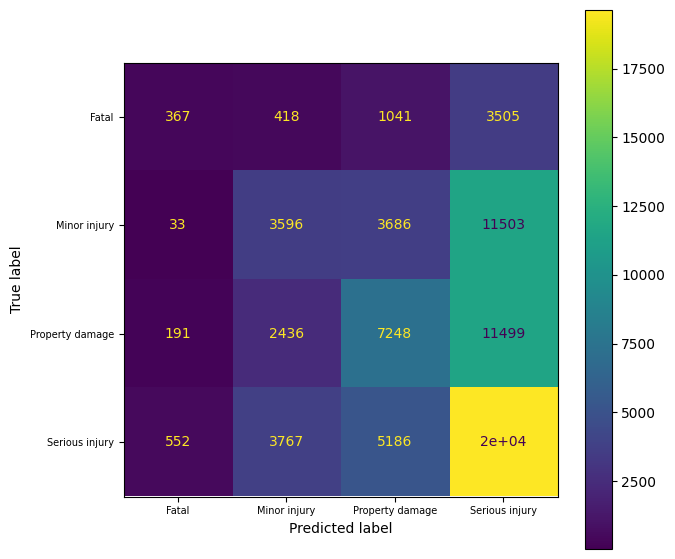

In [58]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'xgbclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_tomek, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
evaluation_class_8(y_pred, y_test)
with open('XGB_tomek.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

In [14]:
import pickle
with open('model_hybrid.pkl', 'wb') as file:
    pickle.dump(model_hybrid, file)